In [2]:
node = 4
edge = [(0,1),(1,2),(2,3),(0,2)]

In [4]:
class imap(object):
    def __init__(self, cur_node):
        pass
imap = dict()
for ed in edge:
    cur, sub = ed
    if cur not in imap:
        imap[cur] = [sub]
    else:
        imap[cur].append(sub)
        
for start in imap:
    #search
    
print(imap)

{0: [1, 2], 1: [2], 2: [3]}


In [12]:
def search(root):
    stack = [root]
    ihash = 0
    res = set()
    count = 0
    while stack:
        cur = stack.pop()
        child = imap.get(cur, None)
        count += 1
        if not child :
            
            print("child:",cur)
            continue
        else:
            stack += child
    return count
search(0)

child: 3
child: 3


6

In [45]:
import numpy as np

In [103]:
a, b, c, d, e = range(5)
G = {
    a: {b, c,  e,},
    b: {a,c,d,e},
    c: {a,b,d},
    d: {b,c,e},
    e: {a,b,d},
}
# from scipy.stats import uniform

# rv = uniform(loc=0, scale=1)
#V = {i: rv.rvs(size=2) for i in range(5)}
V = {
    0:[0,3],
    1:[2.5,1.5],
    2:[5,3],
    3:[4,0],
    4:[0,0]
}
print(V)

{0: [0, 3], 1: [2.5, 1.5], 2: [5, 3], 3: [4, 0], 4: [0, 0]}


In [104]:
def dist(a,b):
    x1, y1 = a
    x2, y2 = b
    dx, dy = x1 - x2, y1 - y2
    return pow(dx * dx + dy * dy, 0.5)
G = {u: {v: dist(V[u], V[v]) for v in G[u]} for u in G}
print(G)

{0: {1: 2.9154759474226504, 2: 5.0, 4: 3.0}, 1: {0: 2.9154759474226504, 2: 2.9154759474226504, 3: 2.1213203435596424, 4: 2.9154759474226504}, 2: {0: 5.0, 1: 2.9154759474226504, 3: 3.1622776601683795}, 3: {1: 2.1213203435596424, 2: 3.1622776601683795, 4: 4.0}, 4: {0: 3.0, 1: 2.9154759474226504, 3: 4.0}}


In [117]:
from heapq import heappop, heappush

def prim(G, start):
    T, Q = {}, []
    close = set([start,])
    for v, w in G[start].items():
            heappush(Q, (w, start, v))
    while Q:
        _, u, v = heappop(Q)
        if v in close or u not in close:
            continue
        if u not in T:
            T[u] = [v,]
        else:
            T[u].append(v)
        close.add(v)

        for nb, w in G[v].items():
            heappush(Q, (w, v, nb))
    return T

k = prim(G, 0)
print(k)

{0: [1], 1: [3, 2, 4]}


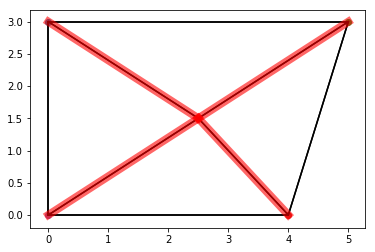

In [119]:
import matplotlib.pyplot as plt

for i in V:
    #print(V[i])
    plt.scatter(V[i][0], V[i][1])
for i in G:
    for j in G[i]:
        temp = list(zip(V[i], V[j]))
        plt.plot(temp[0], temp[1], 'k')
for i,j in k.items():
    for i_neight in j:
        xy = list(zip(V[i], V[i_neight]))
        plt.plot(xy[0], xy[1], 'r', lw=8, alpha=0.6)
plt.show()


In [125]:
def find(C, u):
    if C[u] != u:
        C[u] = find(C, C[u])
    return C[u]


def union(C, R, u, v):
    u, v = find(C, u), find(C, v)
    if R[u] > R[v]:
        C[v] = u
    else:
        C[u] = v
    if R[u] == R[v]:
        R[v] += 1


def kruskal(G):
    E = [(G[u][v], u, v) for u in G for v in G[u]]
    T = set()
    C, R = {u: u for u in G}, {u: 0 for u in G}
    for _, u, v in sorted(E):
        if find(C, u) != find(C, v):
            T.add((u, v))
            union(C, R, u, v)
    return T

k = kruskal(G)
print(k)

{(0, 1), (1, 4), (1, 3), (1, 2)}


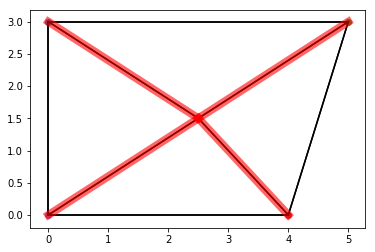

In [126]:
import matplotlib.pyplot as plt

for i in V:
    #print(V[i])
    plt.scatter(V[i][0], V[i][1])
for i in G:
    for j in G[i]:
        temp = list(zip(V[i], V[j]))
        plt.plot(temp[0], temp[1], 'k')
for i,j in k:
    xy = list(zip(V[i], V[j]))
    plt.plot(xy[0], xy[1], 'r', lw=8, alpha=0.6)
plt.show()